In [1]:
import pandas as pd

C:\Users\IRFAN\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\IRFAN\AppData\Local\Temp\ipykernel_6148\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics 
import os
import numpy as np

In [3]:
df= pd.read_csv("creditworthiness.csv")

In [4]:
df_new = df.copy()

In [5]:
df_new.head(10)

,ID,CC_LIMIT_CAT,EDUCATION,MARITAL_STATUS,GENDER,AGE_GROUP,pay_status_1,pay_status_2,pay_status_3,pay_status_4,...,_tpm,_ppm,_RETAIL,_URBAN,_RURAL,_PREMIUM,_TREATMENT,_LTV,_CC_LIMIT,_risk_score
0,1,0,2,2,2,0,2,2,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.000000
1,2,3,2,1,2,1,-1,2,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.028792
2,3,2,2,1,2,1,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.166089
3,4,1,2,2,2,1,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.579180
4,5,1,2,2,1,0,-1,0,-1,0,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.382920
5,6,1,3,1,1,1,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.392380
6,7,7,3,1,1,1,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.966006
7,8,3,2,1,2,0,0,-1,-1,0,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-0.001590
8,9,3,1,2,2,1,0,0,2,0,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.084236
9,10,0,1,1,1,1,-2,-2,-2,-2,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.650350


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                30000 non-null  int64  
 1   CC_LIMIT_CAT      30000 non-null  int64  
 2   EDUCATION         30000 non-null  int64  
 3   MARITAL_STATUS    30000 non-null  int64  
 4   GENDER            30000 non-null  int64  
 5   AGE_GROUP         30000 non-null  int64  
 6   pay_status_1      30000 non-null  int64  
 7   pay_status_2      30000 non-null  int64  
 8   pay_status_3      30000 non-null  int64  
 9   pay_status_4      30000 non-null  int64  
 10  pay_status_5      30000 non-null  int64  
 11  pay_status_6      30000 non-null  int64  
 12  paid_pct_1        30000 non-null  float64
 13  paid_pct_2        30000 non-null  float64
 14  paid_pct_3        30000 non-null  float64
 15  paid_pct_4        30000 non-null  float64
 16  paid_pct_5        30000 non-null  float6

In [64]:
df.describe()

,ID,CC_LIMIT_CAT,EDUCATION,MARITAL_STATUS,GENDER,AGE_GROUP,pay_status_1,pay_status_2,pay_status_3,pay_status_4,...,_tpm,_ppm,_RETAIL,_URBAN,_RURAL,_PREMIUM,_TREATMENT,_LTV,_CC_LIMIT,_risk_score
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.0000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.0000,30000.000000
mean,15000.500000,3.443600,2.157733,1.442733,1.603733,0.751033,-0.016700,-0.133767,-0.166200,-0.220667,...,1.344633,1.2180,-0.938633,-0.944933,-0.956400,-0.955967,-0.908667,559.368050,4122.8050,0.333108
std,8660.398374,2.291985,0.744494,0.521405,0.489129,0.432422,1.123802,1.197186,1.196868,1.169139,...,15.951119,15.4903,0.327523,0.298503,0.236293,0.238948,0.515429,3593.267918,28619.8455,0.350542
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.000000,-1.0000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-616.572451,-1.0000,-0.876743
25%,7500.750000,1.000000,2.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.0000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0000,0.011133
50%,15000.500000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.0000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0000,0.212026
75%,22500.250000,5.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.0000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0000,0.602245
max,30000.000000,7.000000,3.000000,2.000000,2.000000,1.000000,8.000000,8.000000,8.000000,8.000000,...,397.000000,368.0000,1.000000,1.000000,1.000000,1.000000,3.000000,86006.924450,766485.0000,4.935500


In [7]:
X = df_new.drop(['IS_DEFAULT'] , axis=1)
y =df_new['IS_DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Confusion Matrix

In [8]:
ccdefault_bias_df = df_new[df_new._TREATMENT < 1]
ccdefault_causal_df = df_new[df_new._TREATMENT >= 0]

In [9]:
print("all repayment delays\n",
ccdefault_bias_df[ccdefault_bias_df.IS_DEFAULT==1]._TREATMENT.\
value_counts())


all repayment delays
 _TREATMENT
-1    6335
 0      96
Name: count, dtype: int64


In [10]:
print("number of women/men\n",ccdefault_bias_df.GENDER.value_counts())
print("number of women/men with repayment delay\n",
ccdefault_bias_df[ccdefault_bias_df.IS_DEFAULT==1].GENDER.\
value_counts())

number of women/men
 GENDER
2    17644
1    11534
Name: count, dtype: int64
number of women/men with repayment delay
 GENDER
2    3644
1    2787
Name: count, dtype: int64


In [11]:
print("Percentage of women/men with repayment delay\n",ccdefault_bias_df[ccdefault_bias_df.IS_DEFAULT==1].GENDER.\
value_counts()/ccdefault_bias_df.GENDER.value_counts())

Percentage of women/men with repayment delay
 GENDER
2    0.206529
1    0.241633
Name: count, dtype: float64


In [12]:
cf_matrix = metrics.confusion_matrix(ccdefault_bias_df.GENDER==2,\
ccdefault_bias_df.IS_DEFAULT)
print("cf_matrix\n",cf_matrix)

cf_matrix
 [[ 8747  2787]
 [14000  3644]]


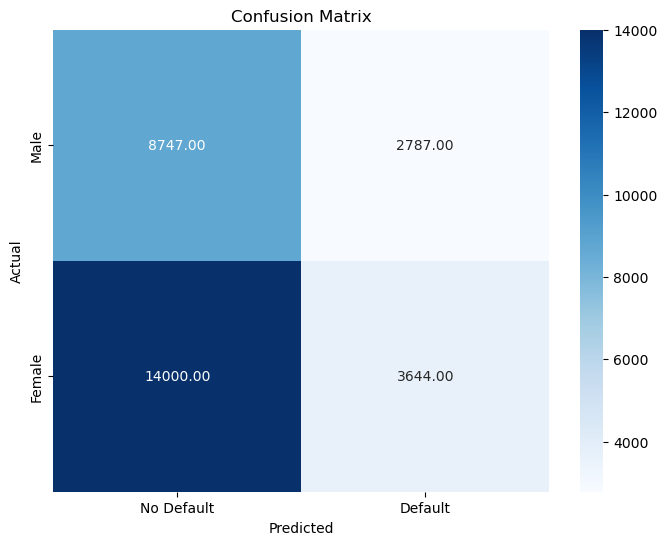

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=['No Default', 'Default'],
            yticklabels=['Male', 'Female'])    
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Quantifying Dataset Bias

In [14]:
from sklearn import model_selection  
from sklearn.model_selection import train_test_split
rand = 9
os.environ['PYTHONHASHSEED']=str(rand)
np.random.seed(rand)
y = ccdefault_bias_df['IS_DEFAULT']
X = ccdefault_bias_df.drop(['IS_DEFAULT'], axis=1).copy()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=rand)

In [15]:
pip install aif360[LawSchoolGPA]

In [16]:
from aif360.datasets import BinaryLabelDataset

train_ds = BinaryLabelDataset(df=X_train.join(y_train),\
label_names=['IS_DEFAULT'],\
protected_attribute_names=['AGE_GROUP', 'GENDER'],
favorable_label=0, unfavorable_label=1)

`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df

In [17]:
test_ds = BinaryLabelDataset(df=X_test.join(y_test),label_names=['IS_DEFAULT'],protected_attribute_names=['AGE_GROUP', 'GENDER'],
favorable_label=0, unfavorable_label=1)

In [18]:
unprivileged_groups=[{'GENDER': 2}]
privileged_groups=[{'GENDER': 1}]

In [19]:
from aif360.metrics import BinaryLabelDatasetMetric

In [20]:
metrics_train_ds = BinaryLabelDatasetMetric(train_ds,unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)

metrics_test_ds = BinaryLabelDatasetMetric(test_ds, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

print ("Difference in mean outcomes TEST between unprivileged and privileged groups = ",
metrics_test_ds.mean_difference())

Difference in mean outcomes TEST between unprivileged and privileged groups =  0.02220936155107256


# Statistical Parity Difference

In [21]:
print('Statistical Parity Difference (SPD):\t\t\t%.4f' %\
metrics_train_ds.statistical_parity_difference())

Statistical Parity Difference (SPD):			0.0394


# Disparate Impact 

In [22]:
print('Disparate Impact (DI):\t\t\t\t\t%.4f' %\
metrics_train_ds.disparate_impact())

Disparate Impact (DI):					1.0522


# Smoothed Empirical Differential

In [23]:
print('Smoothed Empirical Differential Fairness (SEDF):\t%.4f' %\
metrics_train_ds.smoothed_empirical_differential_fairness())

Smoothed Empirical Differential Fairness (SEDF):	0.3514


# Model Bias Quantification

In [24]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [44]:
import tensorflow as tf
from catboost import CatBoostClassifier
rand = 9
np.random.seed(rand)
tf.random.set_seed(rand)

orig_plt_params = plt.rcParams
sns.set()


cb_mdl = CatBoostClassifier(iterations=500, learning_rate=0.5, depth=8)
fitted_cb_mdl = cb_mdl.fit(X_train, y_train, verbose=False)
y_test_cb_pred = fitted_cb_mdl .predict(X_test)




In [45]:
cf_matrix = metrics.confusion_matrix(y_test, y_test_cb_pred)
print("CatBoostClassifier without bias mitigation\n",cf_matrix)

CatBoostClassifier without bias mitigation
 [[5284  428]
 [ 994  589]]


In [46]:
accuracy_without_bias = metrics.accuracy_score(y_test, y_test_cb_pred)
print("Accuracy without bias mitigation:", accuracy_without_bias)

Accuracy without bias mitigation: 0.8050719671007539


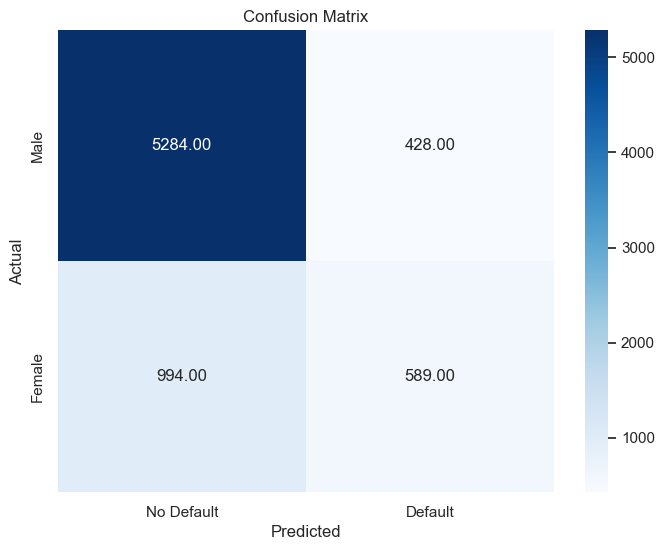

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['Male', 'Female'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Comparison Using standard weight and used weight

# Used weight

In [47]:
test_pred_ds = test_ds.copy(deepcopy=True)
cb_mdl = CatBoostClassifier(iterations=500, learning_rate=0.5, depth=8,class_weights = [0.8,0.2])
fitted_cb_mdl = cb_mdl.fit(X_train, y_train, verbose=False)
y_test_cb_pred = fitted_cb_mdl .predict(X_test)
cf_matrix = metrics.confusion_matrix(y_test,y_test_cb_pred)
print("POSW CatBoostClassifier\n",cf_matrix)

POSW CatBoostClassifier
 [[5437  275]
 [1140  443]]


In [48]:
# Calculate accuracy
accuracy_with_bias = metrics.accuracy_score(y_test, y_test_cb_pred)
print("Accuracy with bias mitigation:", accuracy_with_bias)

Accuracy with bias mitigation: 0.8060315284441398


Bias Mitigation Methods:

1. Preprocessing:
Advantages:

Early Intervention: Detecting and removing bias from training data before model training can prevent biases from being    ingrained in the model.
Transparency: It allows for transparency and understanding of potential biases present in the data.
Domain Flexibility: Can be applied irrespective of the specific model used, making it applicable to various algorithms.

Disadvantages:

Limited Scope: May not address all biases, especially those that emerge during the model training process.
Complexity: Identifying and removing bias at the source might be challenging and depends on the availability of representative data.

2. In-processing:
Advantages:

Model Integration: Mitigating bias during model training ensures that the fairness considerations are directly integrated into the learning process.
Fine-Tuning: Allows for fine-tuning fairness metrics during model training, striking a balance between fairness and accuracy.
Adaptability: The approach can be adapted to various machine learning models.

Disadvantages:

Model Dependency: The effectiveness of in-processing methods is highly dependent on the specific machine learning model being used.
Hyperparameter Tuning: Requires careful tuning of hyperparameters to achieve optimal fairness, which might be challenging.

3. Post-processing:
Advantages:

Flexibility: No impact on the model training process, making it applicable to any pre-existing model.
Outcome Fairness: Can specifically address outcome unfairness by making manual adjustments to predictions.
Greater Impact: Particularly effective in addressing issues related to false positives, where mitigating bias can have a significant impact.

Disadvantages:

Disconnected Impact: Since post-processing occurs after the model is trained, it might be disconnected from the overall model development process.
Manual Intervention: Manual adjustments may lack the precision of automated methods and could be resource-intensive.
Risk of Deformation: Adjustments may introduce unintended consequences and potentially deform the model's behavior.

The greatest disadvantage of bias mitigation methods is the potential to introduce new biases or unintended consequences. Attempts to address existing biases may inadvertently create new biases, impacting accuracy, fairness, and ethical considerations. The effectiveness of mitigation methods is context-dependent, and achieving a balance between fairness and accuracy involves trade-offs. Transparency, human oversight, iterative development, and ethical guidelines are crucial for minimizing risks and ensuring responsible use of machine learning models.

# Reweighting

In [50]:
from aif360.algorithms.preprocessing import Reweighing

reweigher = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
reweigher.fit(train_ds)
train_rw_ds = reweigher.transform(train_ds)


In [52]:
metrics_train_rw_ds = BinaryLabelDatasetMetric(train_rw_ds,\
unprivileged_groups=unprivileged_groups,\
privileged_groups=privileged_groups)
print('Reweigher (REW) Statistical Parity Difference (SPD):\t\t\t%.4f' %\
metrics_train_rw_ds.statistical_parity_difference())
print('REW Disparate Impact (DI):\t\t\t\t\t%.4f' %\
metrics_train_rw_ds.disparate_impact())
print('REW Smoothed Empirical Differential Fairness (SEDF):\t%.4f' %\
metrics_train_rw_ds.smoothed_empirical_differential_fairness())
np.abs(train_ds.instance_weights.mean() - train_rw_ds.instance_weights.mean()) < 1e-6


Reweigher (REW) Statistical Parity Difference (SPD):			0.0000
REW Disparate Impact (DI):					1.0000
REW Smoothed Empirical Differential Fairness (SEDF):	0.2159


True

In [53]:
print('Statistical Parity Difference (SPD):\t\t\t%.4f' %metrics_train_ds.statistical_parity_difference())
print('Disparate Impact (DI):\t\t\t\t\t%.4f' %metrics_train_ds.disparate_impact())
print('Smoothed Empirical Differential Fairness (SEDF):\t%.4f' %metrics_train_ds.smoothed_empirical_differential_fairness())

Statistical Parity Difference (SPD):			0.0394
Disparate Impact (DI):					1.0522
Smoothed Empirical Differential Fairness (SEDF):	0.3514


In [54]:
cb_mdl = CatBoostClassifier(iterations=500, learning_rate=0.5, depth=8)
fitted_cb_mdl = cb_mdl.fit(X_train, y_train, verbose=False, sample_weight=train_rw_ds.instance_weights)

y_test_cb_pred = fitted_cb_mdl .predict(X_test)

cf_matrix = metrics.confusion_matrix(y_test,y_test_cb_pred)

In [55]:
accuracy = metrics.accuracy_score(y_test, y_test_cb_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8016


# In-Processing bias reduction

# Gerry Fair

In [59]:
!pip install --upgrade fairlearn

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\IRFAN\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.




  Using cached numpy-1.26.3-cp310-cp310-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [61]:
from aif360.algorithms.inprocessing.gerryfair_classifier import GerryFairClassifier
from sklearn.tree import DecisionTreeRegressor

dt_gf_mdl = GerryFairClassifier(C=100, gamma=.005, fairness_def='FN',max_iters=50, printflag=True,predictor=DecisionTreeRegressor(max_depth=3))
dt_gf_mdl.fit(train_ds, early_termination=True)
train_pred_gf_ds = dt_gf_mdl.predict(train_ds, threshold=False)
test_pred_gf_ds = dt_gf_mdl.predict(test_ds, threshold=False)

iteration: 1, error: 0.17863181465064204, fairness violation: 0.00248572931140393, violated group size: 0.1340309829548051
iteration: 2, error: 0.17863181465064204, fairness violation: 0.00248572931140393, violated group size: 0.1340309829548051
iteration: 3, error: 0.17863181465064204, fairness violation: 0.00248572931140393, violated group size: 0.1340309829548051
iteration: 4, error: 0.17863181465064204, fairness violation: 0.00248572931140393, violated group size: 0.1340309829548051
iteration: 5, error: 0.17863181465064204, fairness violation: 0.00248572931140393, violated group size: 0.1340309829548051


In [62]:
print('Statistical Parity Difference (SPD):\t\t\t%.4f' %metrics_train_ds.statistical_parity_difference())
print('Disparate Impact (DI):\t\t\t\t\t%.4f' %metrics_train_ds.disparate_impact())
print('Smoothed Empirical Differential Fairness (SEDF):\t%.4f' %metrics_train_ds.smoothed_empirical_differential_fairness())

Statistical Parity Difference (SPD):			0.0394
Disparate Impact (DI):					1.0522
Smoothed Empirical Differential Fairness (SEDF):	0.3514


In [63]:
Binary_train_pred_gf_ds = BinaryLabelDatasetMetric(train_pred_gf_ds,unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)
print('Statistical Parity Difference (SPD):\t\t\t%.4f' %Binary_train_pred_gf_ds.statistical_parity_difference())
print('Disparate Impact (DI):\t\t\t\t\t%.4f' %Binary_train_pred_gf_ds.disparate_impact())
print('Smoothed Empirical Differential Fairness (SEDF):\t%.4f' %Binary_train_pred_gf_ds.smoothed_empirical_differential_fairness())

Statistical Parity Difference (SPD):			0.0253
Disparate Impact (DI):					1.0295
Smoothed Empirical Differential Fairness (SEDF):	0.4288


# Post processing

# Equalized Odds

In [65]:
from catboost import CatBoostClassifier
cb_mdl = CatBoostClassifier(iterations=500, learning_rate=0.5, depth=8)
fitted_cb_mdl = cb_mdl.fit(X_train, y_train, verbose=False)
y_test_cb_pred = fitted_cb_mdl .predict(X_test)

In [66]:
test_ds = BinaryLabelDataset(df=X_test.join(y_test), label_names=['IS_DEFAULT'],protected_attribute_names=['AGE_GROUP', 'GENDER'], favorable_label=0, unfavorable_label=1)
X_posw = X_test.copy()
X_posw['IS_DEFAULT'] = y_test_cb_pred


y_test_cb_pred = BinaryLabelDataset(df=X_posw,\
label_names=['IS_DEFAULT'],\
protected_attribute_names=['AGE_GROUP', 'GENDER'],
favorable_label=0, unfavorable_label=1)

In [69]:
from aif360.algorithms.postprocessing.eq_odds_postprocessing import EqOddsPostprocessing

epp = EqOddsPostprocessing(privileged_groups=privileged_groups,\
unprivileged_groups=unprivileged_groups,\
seed=rand)

In [70]:
epp = epp.fit(test_ds, y_test_cb_pred)
test_pred_epp_ds = epp.predict(y_test_cb_pred)

In [73]:
metrics_test_dir_ds = BinaryLabelDatasetMetric(test_pred_epp_ds,\
unprivileged_groups=unprivileged_groups,\
privileged_groups=privileged_groups)
print('EPP Statistical Parity Difference (SPD):\t\t\t%.4f' %\
metrics_test_dir_ds.statistical_parity_difference())
print('EPP Disparate Impact (DI):\t\t\t\t\t%.4f' %\
metrics_test_dir_ds.disparate_impact())
print('EPP Smoothed Empirical Differential Fairness (SEDF):\t%.4f' %\
metrics_test_dir_ds.smoothed_empirical_differential_fairness())
print ('EPP Difference in mean outcomes TEST between unprivileged and privileged groups in percent' ,round(metrics_test_dir_ds.mean_difference()*100,2))

EPP Statistical Parity Difference (SPD):			0.0062
EPP Disparate Impact (DI):					1.0075
EPP Smoothed Empirical Differential Fairness (SEDF):	0.4710
EPP Difference in mean outcomes TEST between unprivileged and privileged groups in percent 0.62
